In [ ]:
# plot Failure Length (FL) histogram colored by task

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


afi = ia.Performance.get_all_failure_intervals()
afi['score'] = afi['t2'] - afi['t1'] # Failure Length
bins = 20


for (par, dif), data in afi.groupby(['participant', 'difficulty']):
    fig, axes = plt.subplots(ncols=3, figsize=(10,1))
    for task, ax in zip(ia.TASKS, axes.ravel()):
        group = data[data['task'] == task]
        ax.set_title(task)
        if len(group) == 0:
            continue
        xlims = (0, group['score'].max())
        ax.hist(group['score'][group['guidance'] == True], bins=bins, range=xlims, color='blue', alpha=0.5, label="with g.")
        ax.hist(group['score'][group['guidance'] == False], bins=bins, range=xlims, color='red', alpha=0.5, label="without g.")
    print(par, dif)
    plt.show()
    #print(par, task, dif)
    
    
    


P01 easy


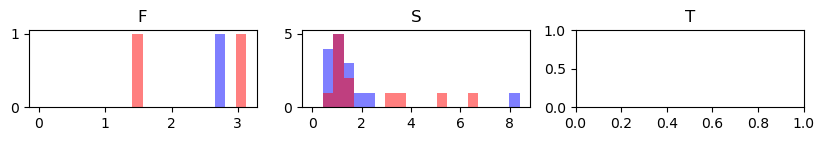

P01 hard


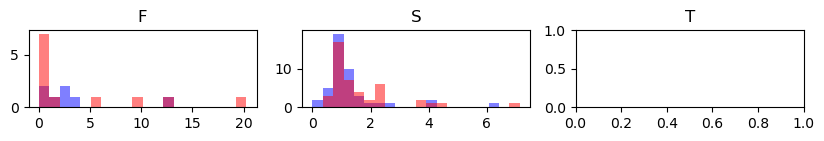

P02 easy


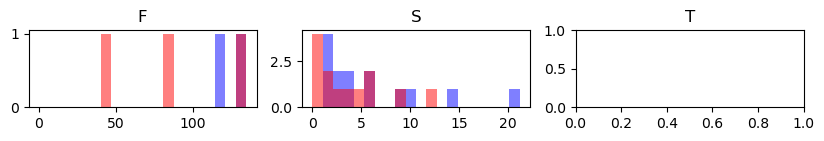

P02 hard


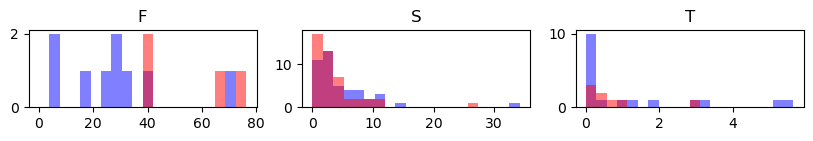

P04 easy


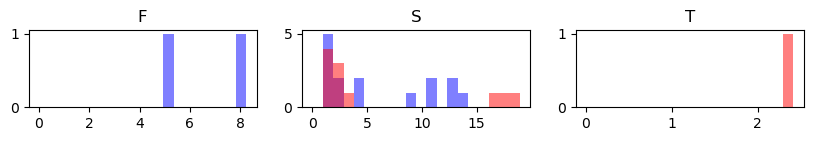

P04 hard


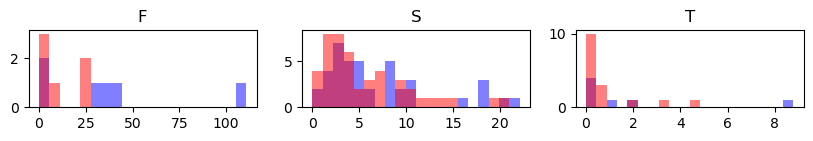

P05 easy


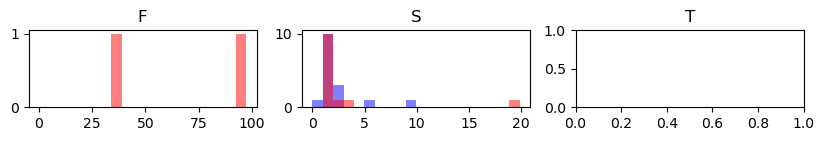

P05 hard


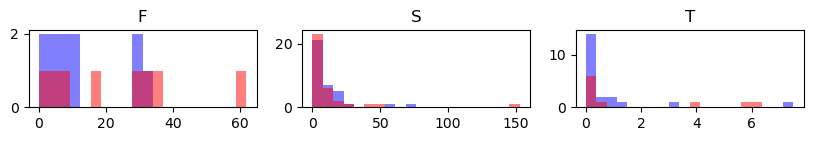

P06 easy


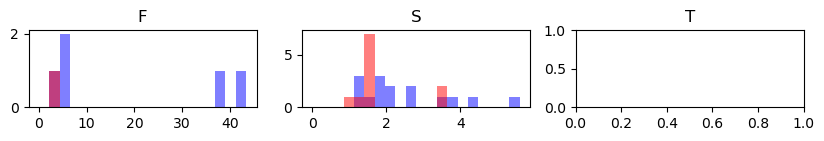

P06 hard


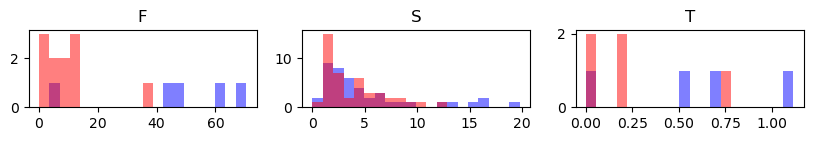

P07 easy


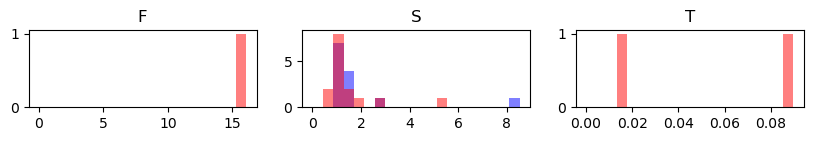

P07 hard


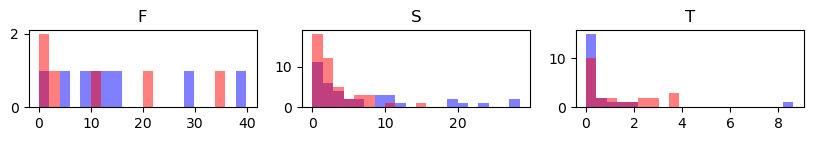

P08 easy


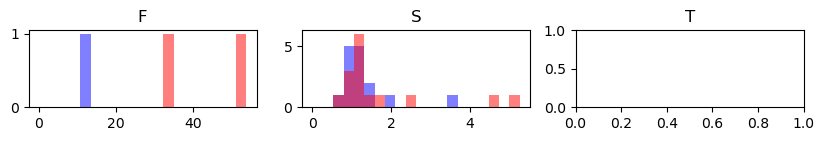

P08 hard


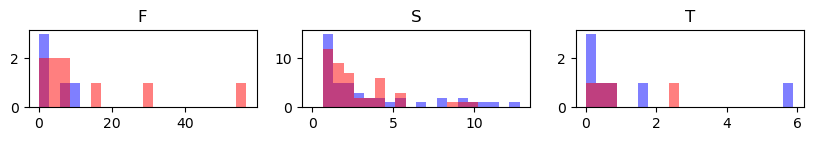

P09 easy


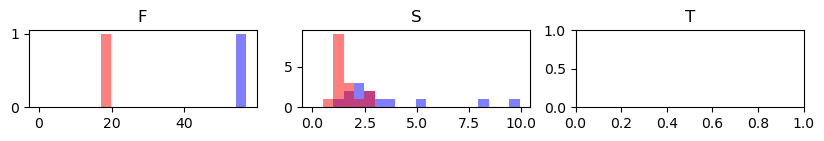

P09 hard


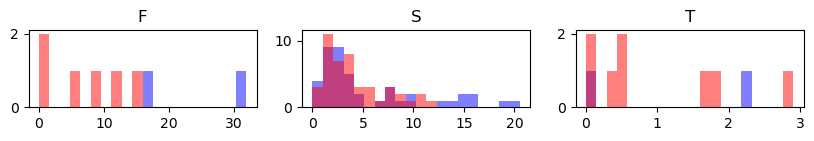

P10 easy


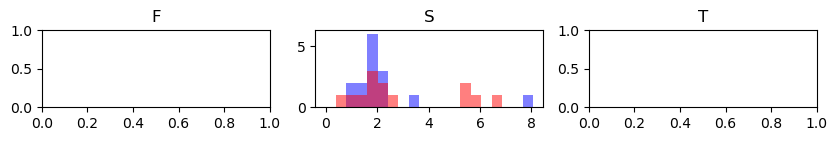

P10 hard


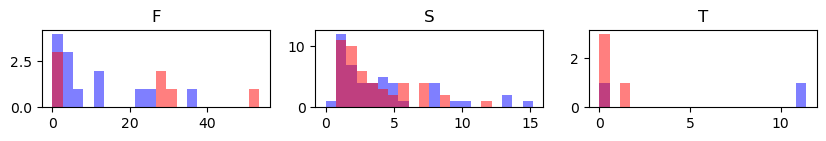

P16 easy


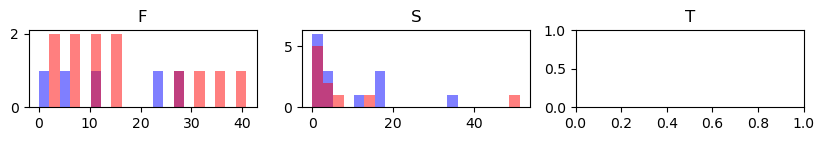

P16 hard


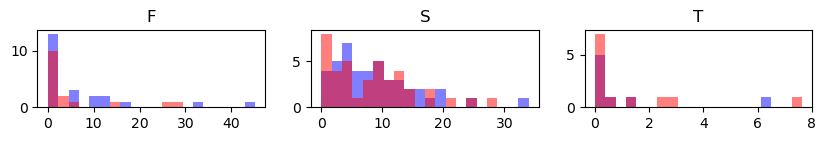

P17 easy


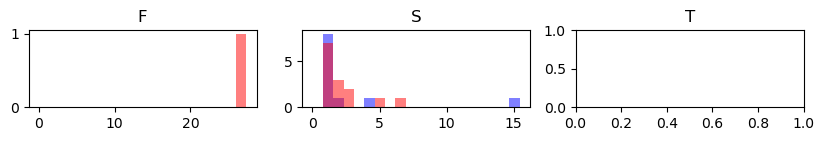

P17 hard


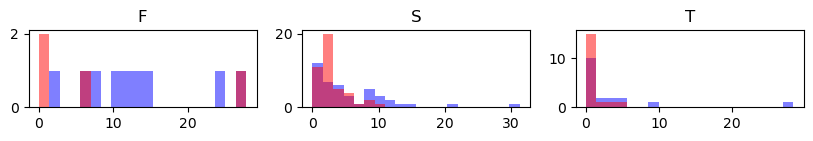

P18 easy


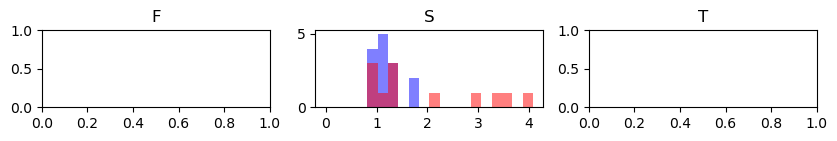

P18 hard


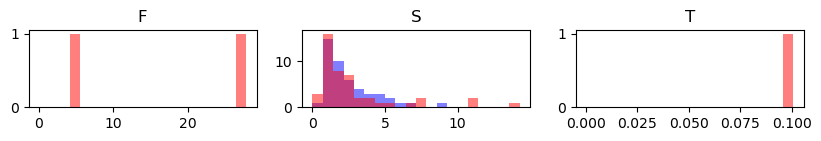

P23 easy


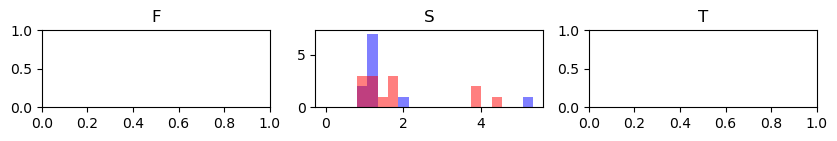

P23 hard


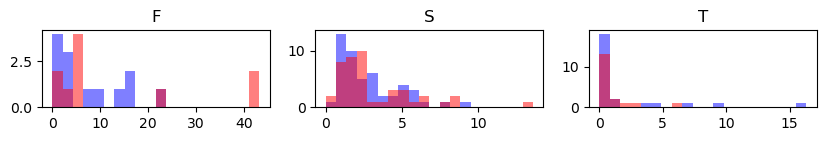

P24 easy


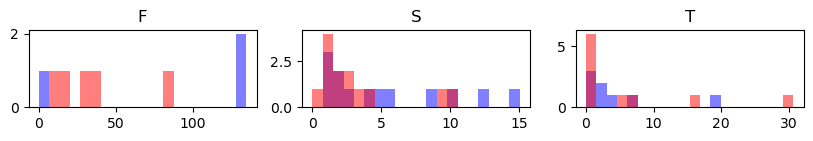

P24 hard


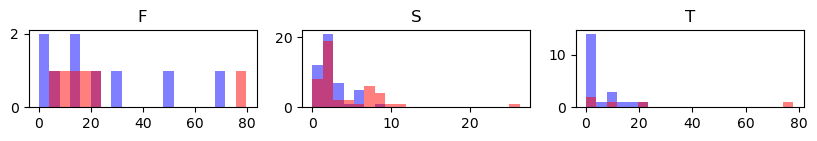

P25 easy


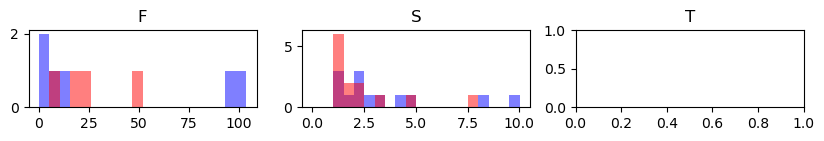

P25 hard


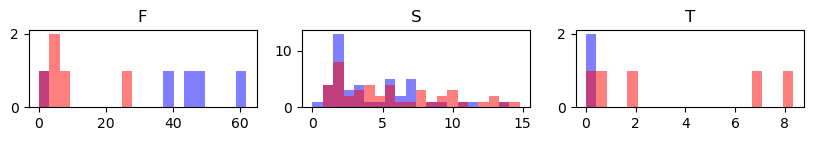

In [2]:
# plot Failure Length (FL) histogram colored by task

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


afi = ia.Performance.get_all_failure_intervals()
afi['score'] = afi['t2'] - afi['t1'] # Failure Length
bins = 20


for (par, dif), data in afi.groupby(['participant', 'difficulty']):
    fig, axes = plt.subplots(ncols=3, figsize=(10,1))
    for task, ax in zip(ia.TASKS, axes.ravel()):
        group = data[data['task'] == task]
        ax.set_title(task)
        if len(group) == 0:
            continue
        xlims = (0, group['score'].max())
        ax.hist(group['score'][group['guidance'] == True], bins=bins, range=xlims, color='blue', alpha=0.5, label="with g.")
        ax.hist(group['score'][group['guidance'] == False], bins=bins, range=xlims, color='red', alpha=0.5, label="without g.")
    print(par, dif)
    plt.show()
    #print(par, task, dif)
    
    
    


In [1]:
# plot Failure Length (FL) histogram colored by task

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



afi = ia.Performance.get_all_failure_intervals()
afi['score'] = afi['t2'] - afi['t1'] # Failure Length


for task in afi['task'].unique():
    fi = afi[(afi['participant'] == "P02") & (afi['task'] == task)]
    #print(fi)
    #     fig, axes = plt.subplots(ncols=len(task))
    #     plt.hist(fi['score'], )
    
    g = sns.FacetGrid(fi, col='score', row='trial', sharey=False)
    g.map(plt.hist, 'score', bins=10, color='blue', alpha=0.7)

    


# for (par, trial), data in ia.load_tabularised().has_eyetracking():
#     fi = ia.get_all_task_failure_intervals(data) # compute failure intervals
#     fi['score'] = fi['t2'] - fi['t1'] # failure length
    
    


def get_fl(data):
    fi = ia.get_all_task_failure_intervals(data) # compute failure intervals
    print(fi)
    scores = {task : (intervals['t2'] - intervals['t1']).to_numpy() for task, intervals in fi.items()}
    scores = {task : score[score > 0] for task, score in scores.items()} # some are 0... this is weird...
    return scores



def get_minmax(fl):
    smin = min([min(x, default=float('inf')) for x in fl.values()])
    smax = max([max(x, default=-float('inf')) for x in fl.values()])
    return smin, smax

def plot_failure_length_distributions(difficulty='all'):
    
    dataset = []
    dataset_iter = ia.load_tabularised().has_eyetracking()
    cols = 4 # number of columns to use
    if difficulty == "easy":
        dataset_iter = dataset_iter.is_easy()
        cols = 2
    elif difficulty == "hard":
        dataset_iter = dataset_iter.is_hard()
        cols = 2
    
    for trial, tgroup in dataset_iter.groupby_trial():
        for par, data in tgroup.items():
            dataset.append(((par, trial), get_fl(data)))
    
    fig, axes = plt.subplots(nrows=len(dataset)//cols, ncols=cols, figsize=(12, 16), sharey='row', sharex=True)
    
    mins, maxs = zip(*[get_minmax(fl) for (_, fl) in dataset])
    mins, maxs = min(list(mins)), max(list(maxs))
    mins, maxs = np.log10(mins) + 1, np.log10(maxs) + 1

    num_bins = 50
    bins = np.linspace(mins, maxs, num_bins)

    for ax, ((par, trial), fl) in zip(axes.T.ravel(), dataset):
        labels = list(fl.keys())
        colors = [ia.get_task_properties(task)['color'] for task in labels]
        scores = [np.log10(x) for x in fl.values()]
        n, bins, patches = ax.hist(scores, color=colors, label=labels, bins=bins, stacked=True, alpha=0.5)
        ax.set_xticklabels(['$10^{%d}$' % t for t in ax.get_xticks()])
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))
        
    for (ax, ((par, _), _)) in zip(axes.T[0], dataset):
        ax.set_ylabel(par)
    fig.subplots_adjust(wspace=0.05)  # Adjust horizontal space

    fi = ia.get_all_task_failure_intervals(data) # compute failure intervals

    




NameError: name 'sns' is not defined

/tmp/ipykernel_16959/3413195488.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$10^{%d}$' % t for t in ax.get_xticks()])


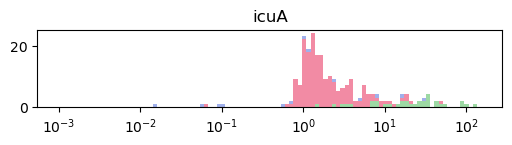

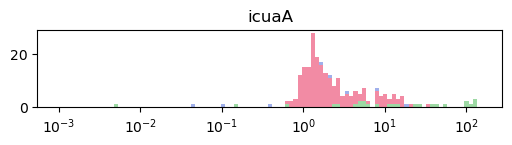

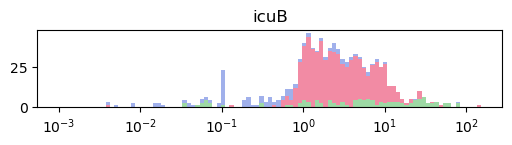

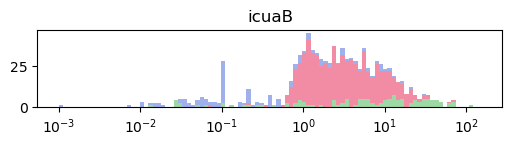

In [91]:
# plot Failure Length (FL) histogram for each of the tasks coloured by task for participants overall

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def get_fl(data):
    fi = ia.get_all_task_failure_intervals(data) # compute failure intervals
    scores = {task : (intervals['t2'] - intervals['t1']).to_numpy().astype(float) for task, intervals in fi.items()}
    scores = {task : score[score > 0] for task, score in scores.items()} # some are 0... this is weird...
    return scores

def get_minmax(fl):
    smin = min([min(x, default=float('inf')) for x in fl.values()])
    smax = max([max(x, default=-float('inf')) for x in fl.values()])
    return smin, smax

def plot_failure_length_distributions_all(figsize=(12,4), bins=100):
    dataset_iter = ia.load_tabularised().has_eyetracking()
    
    datasets = {}
    mins, maxs = float('inf'), -float('inf')
    for trial, tgroup in dataset_iter.groupby_trial():
        tdataset = {task:[] for task in ia.TASKS}
        for par, data in tgroup.items():
            for task, fl in get_fl(data).items():
                tdataset[task].append(fl)      
        tdataset = {task:np.concatenate(data, dtype=float) for task, data in tdataset.items()}
        _mins, _maxs = zip(*[(fl.min(), fl.max()) for _, fl in tdataset.items()])
        _mins, _maxs = min(list(_mins)), max(list(_maxs))
        mins, maxs = min(mins, _mins), max(maxs, _maxs)
        datasets[trial] = tdataset
    
    num_bins = bins
    mins, maxs = np.log10(mins), np.log10(maxs)
    bins = np.linspace(mins, maxs, num_bins)
    
    #fig, axes = plt.subplots(ncols=2, nrows=2, figsize=figsize, sharey='row', sharex=True)
    #for ax, (trial, fl) in zip(axes.ravel(), datasets.items()):
    for trial, fl in datasets.items():
        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
        labels = [ia.get_task_properties(task)['name'].capitalize() + " task" for task in fl.keys()]
        colors = [ia.get_task_properties(task)['color'] for task in fl.keys()]
        scores = [np.log10(x) for x in fl.values()]
        n, bins, patches = ax.hist(scores, color=colors, label=labels, bins=bins, stacked=True, alpha=0.5)
        ax.set_xticklabels(['$10^{%d}$' % t for t in ax.get_xticks()])
        #plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))
        ax.set_title(trial)
        plt.savefig(f"../result/{trial}_FL_dist.png", bbox_inches="tight", dpi=300)

    
    #plt.subplots_adjust(wspace=0.05)
    #return fig

fig = plot_failure_length_distributions_all(figsize=(6,1))
#plt.legend(fontsize=8, loc="upper left")
#plt.savefig("../result/icuA_FL_dist.png", bbox_inches="tight", dpi=300)
plt.show()



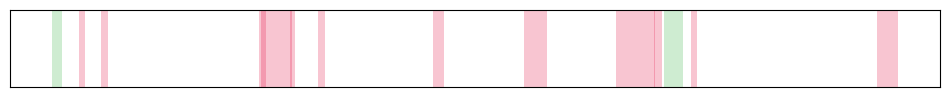

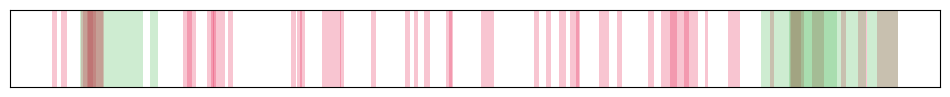

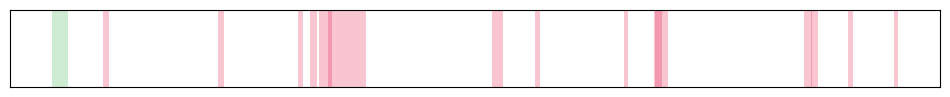

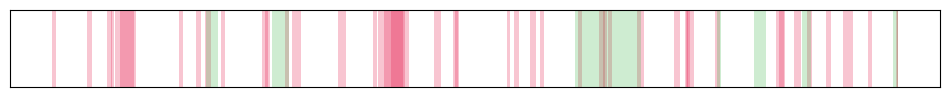

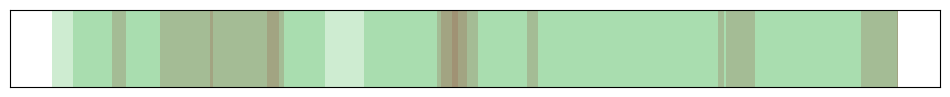

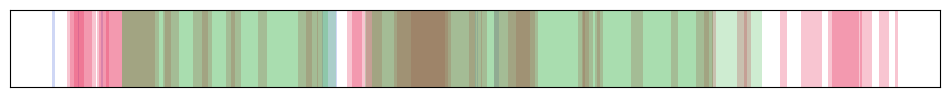

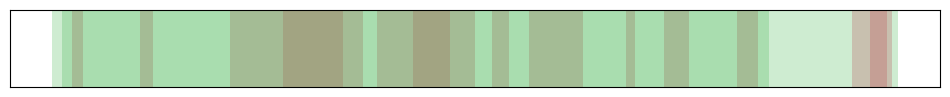

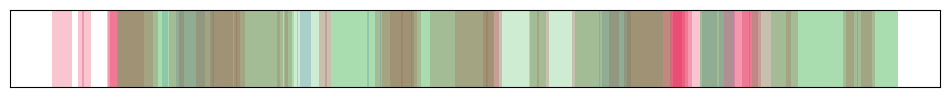

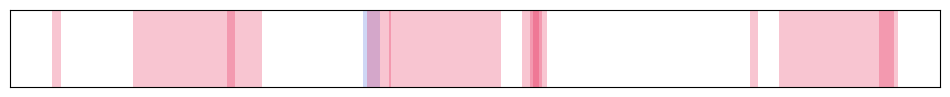

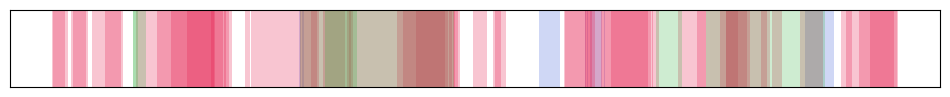

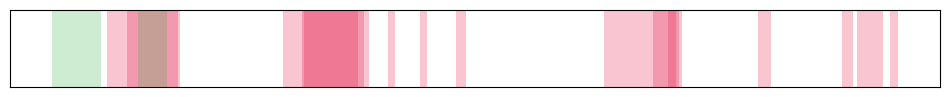

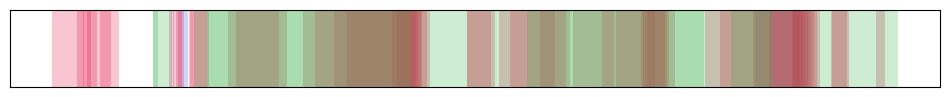

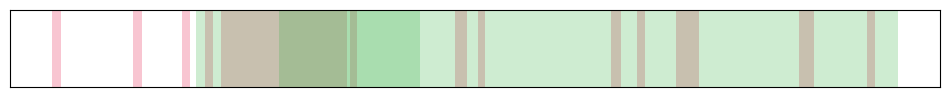

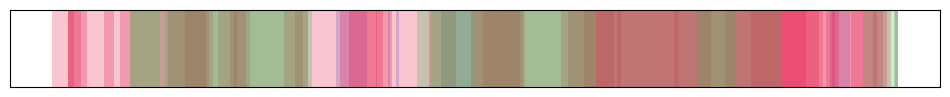

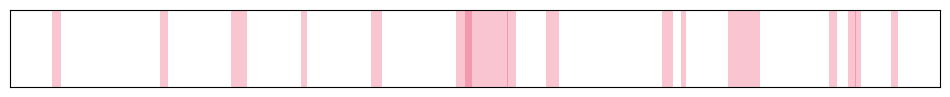

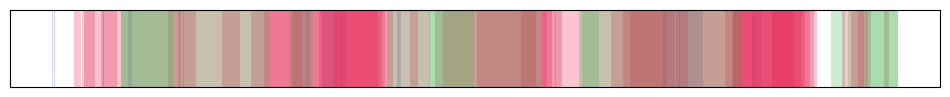

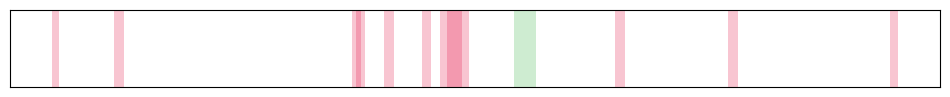

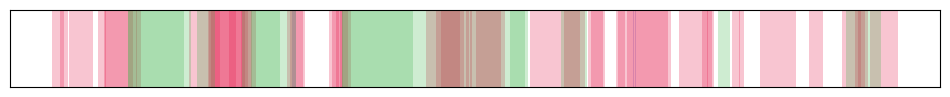

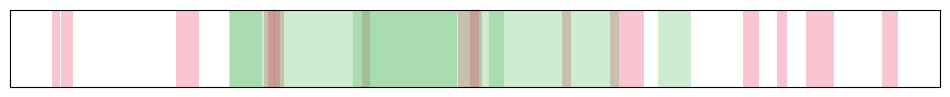

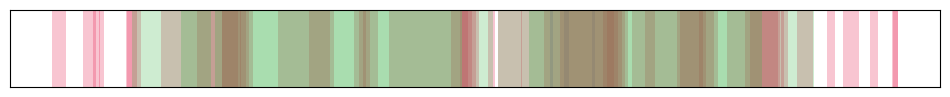

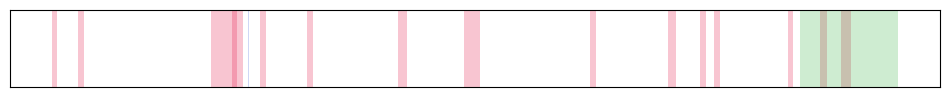

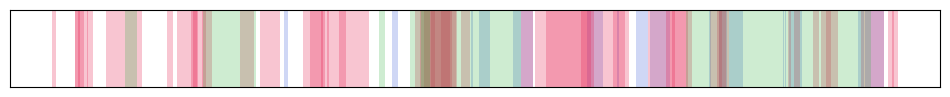

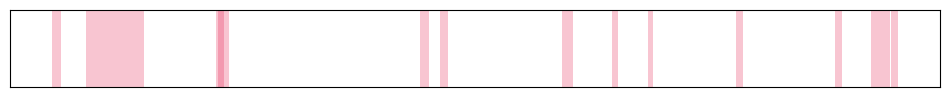

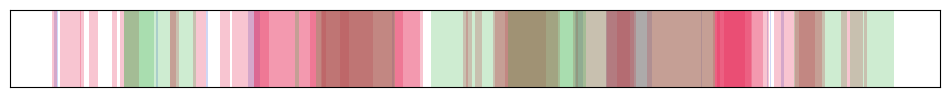

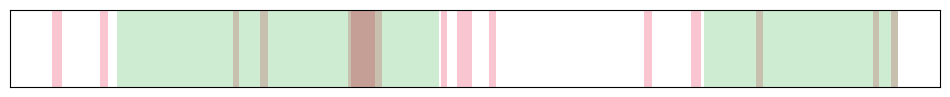

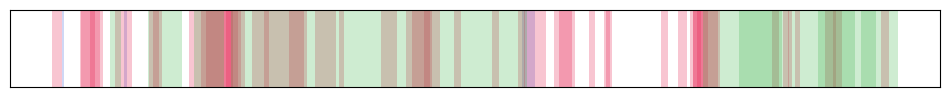

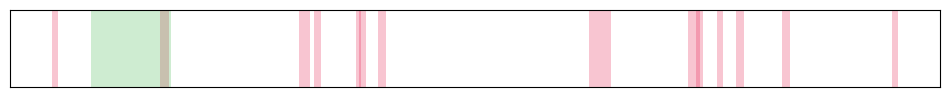

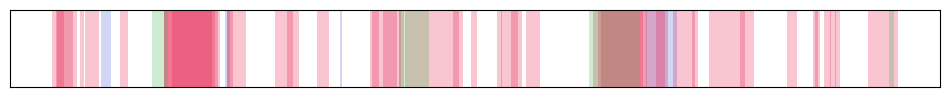

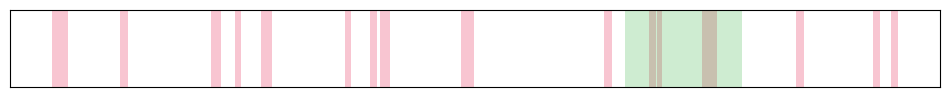

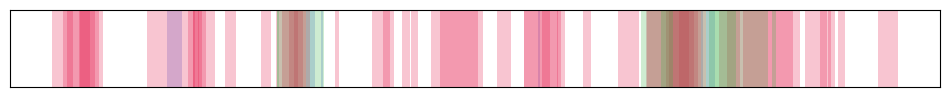

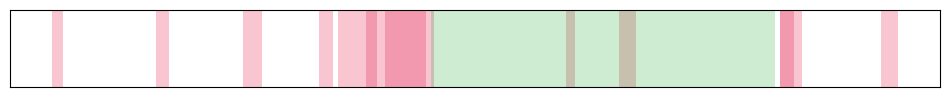

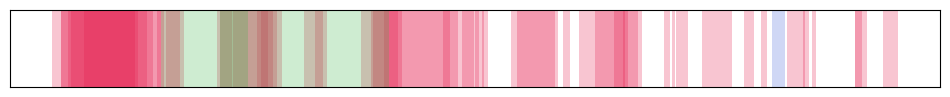

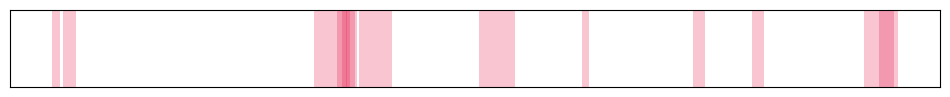

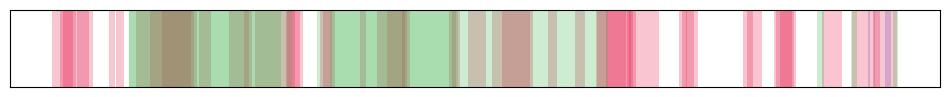

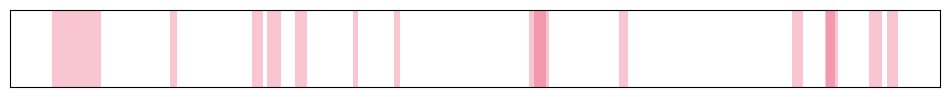

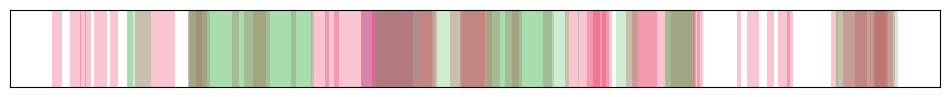

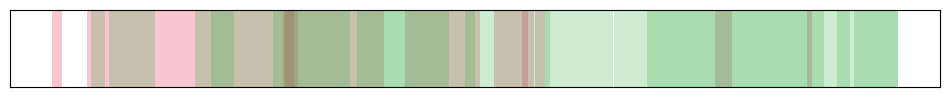

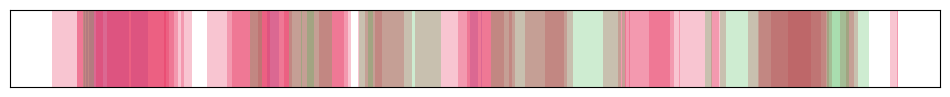

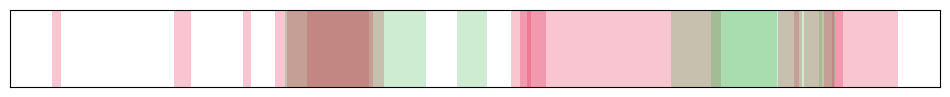

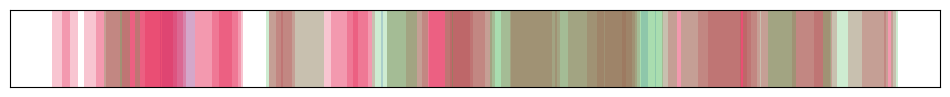

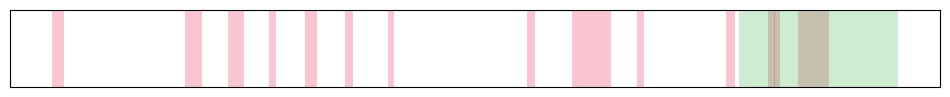

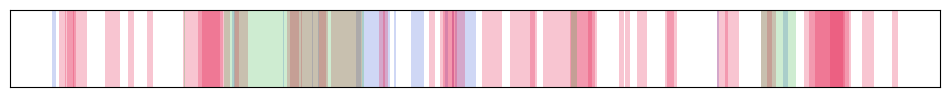

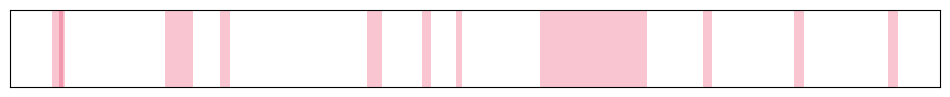

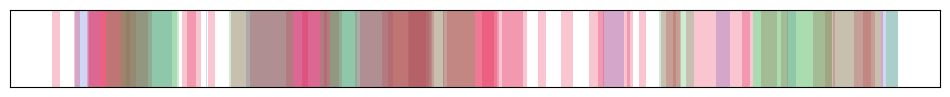

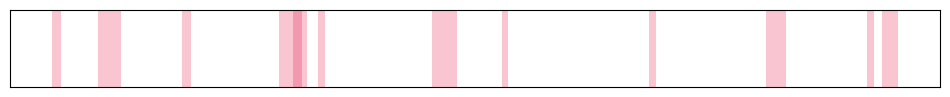

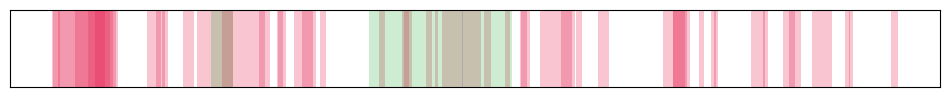

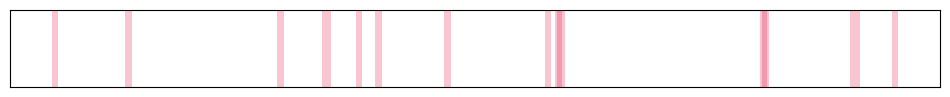

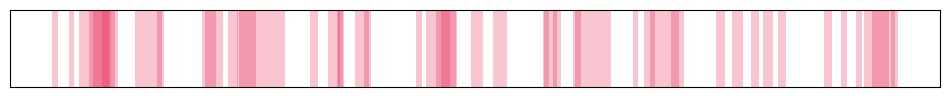

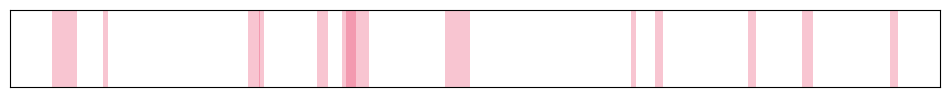

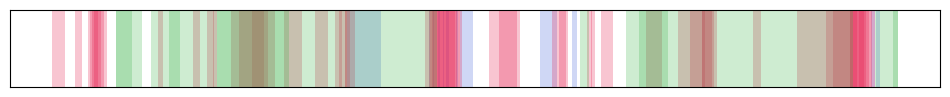

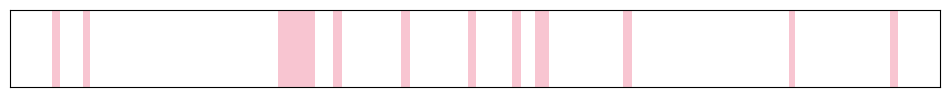

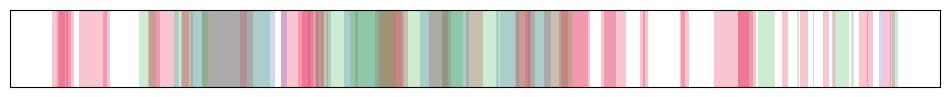

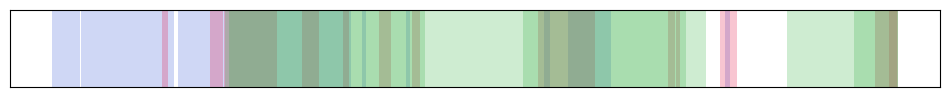

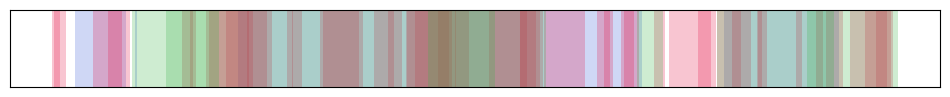

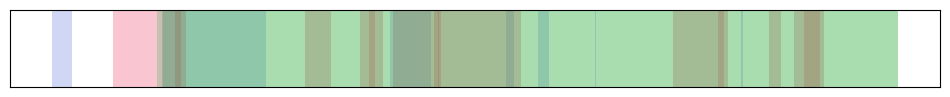

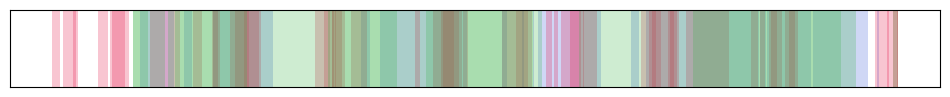

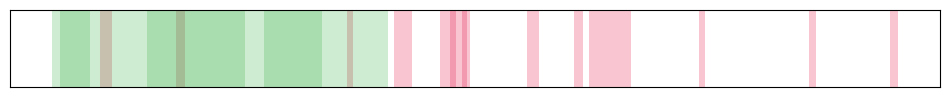

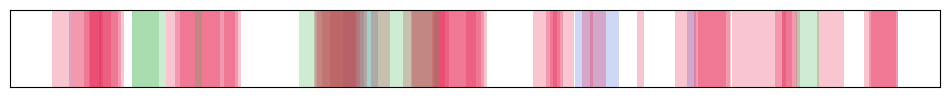

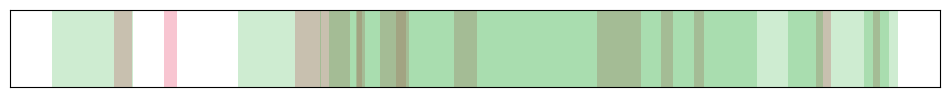

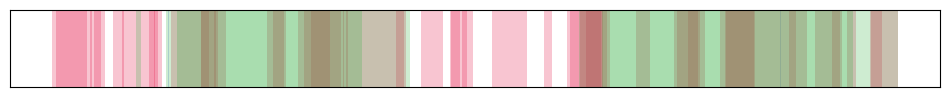

In [1]:
# plot failure intervals coloured by task.
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for (par, trial), data in ia.load_tabularised().has_eyetracking():
    # get data
    fi_tasks = ia.get_all_task_failure_intervals(data)
    plt.figure(figsize=(12,1))
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    for task, fi_task in fi_tasks.items():
        color = ia.get_task_properties(task)['color']
        ia.plot_intervals(fi_task[['t1', 't2']], color=color)
    plt.show()
